# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [48]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as st
from scipy.stats import pearsonr
import seaborn as sns


In [28]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [29]:
print hospital_read_df.shape
print hospital_read_df.describe()
print ('----     Null listings     ----')
print hospital_read_df.isnull().sum()

(16860, 12)
       Provider Number     Footnote  Excess Readmission Ratio  \
count     16860.000000  3129.000000              13731.000000   
mean     263516.943654     2.905401                  1.002582   
std      160146.191702     2.074384                  0.091088   
min       10001.000000     1.000000                  0.549500   
25%      110181.500000     1.000000                  0.949500   
50%      250157.000000     1.000000                  0.997100   
75%      390138.250000     5.000000                  1.052350   
max      670091.000000     7.000000                  1.909500   

       Predicted Readmission Rate  Expected Readmission Rate  \
count                13731.000000               13731.000000   
mean                    16.916532                  16.866135   
std                      6.197542                   5.989652   
min                      2.700000                   2.900000   
25%                     15.200000                  15.800000   
50%               

****
## Preliminary Analysis

In [30]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

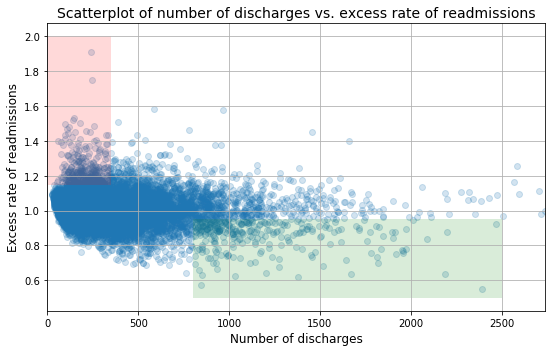

In [31]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Question A:

Do you agree with the above analysis and recommendations? Why or why not?

I do agree with most of the above analysis and recommendations. The (A) Initial Observations and (B) Statistics seem to lineup with the results of the plot. However, I can't confidently say that there is a significant corrilation between the number of discharges and the readmission rates as stated in the (C) Conclusions.

Question B:
Provide support for your arguments and your own recommendations with a statistically sound analysis:

In [41]:
clean_hospital_read_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]

In [42]:
discharge_100 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100]
mean_readm_100 = discharge_100['Excess Readmission Ratio'].mean()
readm_100_gt_1 = discharge_100.loc[discharge_100['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count()*100/df100['Excess Readmission Ratio'].count()
discharge_1000 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000]
mean_readm_1000 = discharge_1000['Excess Readmission Ratio'].mean()
readm_1000_gt_1 = discharge_1000.loc[discharge_1000['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count()*100/df1000['Excess Readmission Ratio'].count()
print("Mean excess readmission rate for hospitals with discharges < 100: {} and there are {}% with readmission greater than 1".format(mean_readm_100,readm_100_gt_1))
print("Mean excess readmission rate for hospitals with discharges > 1000: {} and there are {}% with readmission greater than 1".format(mean_readm_1000,readm_1000_gt_1))

Mean excess readmission rate for hospitals with discharges < 100: 1.02261835017 and there are 63% with readmission greater than 1
Mean excess readmission rate for hospitals with discharges > 1000: 0.978335421166 and there are 44% with readmission greater than 1


1) The test above does match the statistical findings in the preliminary report. 

Hypothesis Test:
- The null hypothesis is that the excess readmission rate is uncorrelated with number of discharges
- The alternate hypothesis is that excess readmission rate is negatively linearly correlated with number of discharges.

In [43]:
discharge_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
discharge_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
ERR_less_100 = discharge_100['Excess Readmission Ratio']
ERR_greater_1000 = discharge_1000['Excess Readmission Ratio']

In [44]:
pearsonr, pearsonpvalue = pearsonr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])
print(pearsonr, pearsonpvalue)

(-0.097397943510793533, 1.222547377680967e-25)


In [46]:
tstat,pvalue = st.stats.ttest_ind(ERR_less_100,ERR_greater_1000)
print(tstat,pvalue)

(10.060620398500793, 3.778753923341558e-23)


2) The above analysis shows no strong connection between the number of discharges and the excess readmission ratio. However, the t-statistic of 10.061 shows that the capacity of hospitals with excess readmission ratio less than 100 is not the same as the capacity of hospitals with excess readmission ratio greater than 1000. 

The capacity and excess readmission ratio are weakly correlated, and the excess readmission ratio may be more strongly correlated to another parameter besides the capacity.

3) The t-score for an alpha of 0.01 is 2.33. A p-value smaller than this alpha indicates the two-samples of data are different enough to be statistically significant.

4) Statistical significance is based on the calculated t-statistic and p-value. Practical significance considers whether the difference is meaningful enough in a practical sense. Consideration of the practical significance changes my recommendation to the client. My conclusion is that the practical cost of implementing changes to the hospitals with less than 100 discharges will need to be carefully considered before any changes take place.

5) The given scatterplot does not have a single line / value information on how the two quantities are correlated. There is no visibility on how dense or sparse the points are. This can be solved with jointplot, which gives information on histograms of each quantities and also how a regression line fits through the scatterplot.

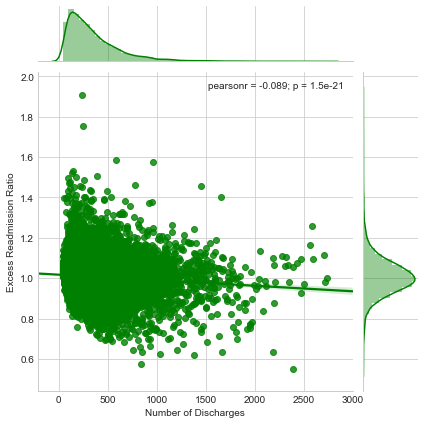

In [50]:
sns.set_style('whitegrid')
sns.jointplot(x='Number of Discharges',y='Excess Readmission Ratio',
              data=clean_hospital_read_df.iloc[81:-3],color='g',kind='reg')